In [3]:
import numpy as np
import math
from ete3 import Tree

Probopass : A
Aggron : T
Bastiodon : T
Regirock : G
Registeel : G
Regice : G
Klingklang : G
Metagross : C
Genesect : A
Porygon=Z : C
Magnezone : C
Forretress : T
Electrode : A
Ferrothorn : G

Proposed tree 1:
(((( Electrode , Magnezone) ,Porygon=Z) , (((( Aggron , Bastiodon ) ,
Forretress ) , Ferrothorn ) , ((((( Regirock , Regice ) , Registeel ) , Metagross
) , Klingklang ) , Genesect ))) , Probopass );

Proposed tree 2:
((((( Regirock , Regice ) , Registeel ) , (( Metagross , Klingklang ) ,
Genesect )) , ((( Aggron , Bastiodon ) ,( Forretress , Ferrothorn )) , Probopass
)) ,( Porygon=Z,( Magnezone , Electrode )));


In [193]:
# SANKOFF ALGORITHM

# First step: create a dictionary matching name of nodes to labeling

pokedict = {"Probopass":'A',"Aggron":'T',"Bastiodon":'T',"Regirock":'G',"Registeel":'G',"Regice":'G',"Klingklang":'G',"Metagross":'C',"Genesect":'A',"Porygon-Z":'C',"Magnezone":'C',"Forretress":'T',"Electrode":'A',"Ferrothorn":'G'}
nucledict = { 0:'A', 1:'C', 2:'G', 3:'T' }
StepMatrix = [[0, 3, 4, 9],
              [3, 0, 2, 4],
              [4, 2, 0, 4],
              [9, 4, 4, 0]]
# Assuming A,C,G,T (and not A,T,C,G like I previously thought)

for pair in pokedict.items():
    #print(pair)
    pass
for pair in nucledict.items():
    #print(pair)
    pass

In [209]:
def assign_leaf_scores(leaf):
    
    scoredict = {'A':[0, math.inf, math.inf, math.inf], 'C':[math.inf, 0, math.inf, math.inf], 'G': [math.inf, math.inf, 0, math.inf], 'T':[math.inf, math.inf, math.inf, 0]}
    
    if pokedict[leaf] == 'A':
        return scoredict['A']
    elif pokedict[leaf] == 'C':
        return scoredict['C']
    elif pokedict[leaf] == 'G':
        return scoredict['G']
    elif pokedict[leaf] == 'T':
        return scoredict['T']

In [273]:
N1 = "(((( Electrode , Magnezone ) , Porygon-Z ) , (((( Aggron , Bastiodon ) , Forretress ) , Ferrothorn ) , ((((( Regirock , Regice ) , Registeel ) , Metagross ) , Klingklang ) , Genesect ))) , Probopass );"
N2 = "((((( Regirock , Regice ) , Registeel ) , (( Metagross , Klingklang ) , Genesect )) , ((( Aggron , Bastiodon ) ,( Forretress , Ferrothorn )) , Probopass )) ,( Porygon-Z ,( Magnezone , Electrode )));"
print(Tree(N1))
print(Tree(N2))


            /-Electrode
         /-|
      /-|   \-Magnezone
     |  |
     |   \-Porygon-Z
     |
     |            /-Aggron
     |         /-|
     |      /-|   \-Bastiodon
   /-|     |  |
  |  |   /-|   \-Forretress
  |  |  |  |
  |  |  |   \-Ferrothorn
  |  |  |
  |  |  |               /-Regirock
  |  |  |            /-|
  |   \-|         /-|   \-Regice
--|     |        |  |
  |     |      /-|   \-Registeel
  |     |     |  |
  |     |   /-|   \-Metagross
  |     |  |  |
  |      \-|   \-Klingklang
  |        |
  |         \-Genesect
  |
   \-Probopass

               /-Regirock
            /-|
         /-|   \-Regice
        |  |
        |   \-Registeel
      /-|
     |  |      /-Metagross
     |  |   /-|
     |   \-|   \-Klingklang
     |     |
     |      \-Genesect
   /-|
  |  |         /-Aggron
  |  |      /-|
  |  |     |   \-Bastiodon
  |  |   /-|
  |  |  |  |   /-Forretress
--|   \-|   \-|
  |     |      \-Ferrothorn
  |     |
  |      \-Probopass
  |
  |   /-Porygon-Z
   

In [276]:
N1 = "(((( Electrode , Magnezone ) , Porygon-Z ) , (((( Aggron , Bastiodon ) , Forretress ) , Ferrothorn ) , ((((( Regirock , Regice ) , Registeel ) , Metagross ) , Klingklang ) , Genesect ))) , Probopass );"
N2 = "((((( Regirock , Regice ) , Registeel ) , (( Metagross , Klingklang ) , Genesect )) , ((( Aggron , Bastiodon ) ,( Forretress , Ferrothorn )) , Probopass )) ,( Porygon-Z ,( Magnezone , Electrode )));"
# Replace all whitespace to remove any character counting ambiguities
N1 = N1.replace(" ", "")
N2 = N2.replace(" ", "")

In [292]:
# More detailed look at the trees
tree=Tree(N1)
tree.show()
tree2=Tree(N2)
tree2.show()

In [285]:
class node: # internal node class that defines name, name of left and right children, and score
    def __init__(internalnode,name,left,right,score,nucleotide):
        internalnode.name = name
        internalnode.left = left
        internalnode.right = right
        internalnode.score = score
        internalnode.nucleotide = nucleotide

def sankoffinit(originalpoke):
    
    # both trees have the same number of leaves (14) and the same number of nodes (13)
    # a rule is that the number of internal nodes = number of leaves-1
    
    poke = originalpoke[:-1] # Remove last element ;
    poke = poke.replace(" ","")

    node_number = 0           # node nb will be the break condition for the while loop
    for c in poke:
        if c == ',':
            node_number += 1

    node_instance = 0
    nodes_list = []           # stores every node that has been identified        

    while(node_instance < node_number): # while we have'nt identified every node yet

        # Lists and variables necessary for counting through our string 
        charcount = 0
        node_opencount = 0
        node_openpos = []

        for n in poke:            # NOTE: reversed is an iterator, you can't call a print to it

            if(n == '('):         # if we find a node being opened
                node_opencount += 1 
                node_openpos.append(charcount)

            if(n == ')'):         # start to create a node object
                node_instance += 1

                close_node = charcount
                open_node = node_openpos[-1]                 # get last position where a node was opened
                node_elements = poke[open_node+1:close_node]
                split_node = node_elements.split(',')

                internal_node = node(name = "*Node_" + str(node_instance), left = split_node[1], right = split_node[0], score = [0,0,0,0], nucleotide = '*') # score is placeholder for now
                nodes_list.append(internal_node)             # add to our list of nodes. The * means it's a node and not a leaf

                poke = poke.replace(poke[open_node:close_node+1],internal_node.name)
                # print(poke)
                break # restart loop, with updated merged branches or nodes. Not the most efficient but should work

            charcount += 1       # has to occur after all the updates
        # print(poke)

    return nodes_list

In [291]:
# PARSING BOTH TREES
N1_nodes_list = sankoffinit(N1)
for n in N1_nodes_list:
        print("Node name: ", n.name, " Node left child: ", n.left," Node right child: ", n.right)
        
print('\n')
        
N2_nodes_list = sankoffinit(N2)
for n in N2_nodes_list:
        print("Node name: ", n.name, " Node left child: ", n.left," Node right child: ", n.right)

Node name:  *Node_1  Node left child:  Magnezone  Node right child:  Electrode
Node name:  *Node_2  Node left child:  Porygon-Z  Node right child:  *Node_1
Node name:  *Node_3  Node left child:  Bastiodon  Node right child:  Aggron
Node name:  *Node_4  Node left child:  Forretress  Node right child:  *Node_3
Node name:  *Node_5  Node left child:  Ferrothorn  Node right child:  *Node_4
Node name:  *Node_6  Node left child:  Regice  Node right child:  Regirock
Node name:  *Node_7  Node left child:  Registeel  Node right child:  *Node_6
Node name:  *Node_8  Node left child:  Metagross  Node right child:  *Node_7
Node name:  *Node_9  Node left child:  Klingklang  Node right child:  *Node_8
Node name:  *Node_10  Node left child:  Genesect  Node right child:  *Node_9
Node name:  *Node_11  Node left child:  *Node_10  Node right child:  *Node_5
Node name:  *Node_12  Node left child:  *Node_11  Node right child:  *Node_2
Node name:  *Node_13  Node left child:  Probopass  Node right child:  *Nod

In [286]:
# Next step: go through every node element and calculate scores for the leaves first
# Then iterate accordingly with nodes that have calculable scores
# Finally, perform traceback and calculate parsimony score

def calculate_node_score(node_list):
    
    dic_L = {} # Create a dictionary of argmins for scores for left
    dic_R = {} # Create a dictionary of argmins for scores for left
    dic_score = {}
    
    for node in node_list:
        dic_score[node.name] = node.score
    for pokemon in pokedict:
        dic_score[pokemon] = assign_leaf_scores(pokemon) # necessary in the else check below
    
    StepMatrix = [[0, 3, 4, 9],
              [3, 0, 2, 4],
              [4, 2, 0, 4],
              [9, 4, 4, 0]]
    
    for node in node_list:
        
        node_calc_list = [] # at each iteration, stores 4 sums. The min and argmin are both important
        
        if( (node.left[0] != '*') and (node.right[0] !=  '*')): # if both elements are not internal nodes
            
            # Calculate corresponding score
            left_child_score = dic_score[node.left]
            right_child_score = dic_score[node.right]

            for i in range(4):
                left_calc  = [ left_child_score[0] + StepMatrix[0][i], left_child_score[1] + StepMatrix[1][i], \
                              left_child_score[2] + StepMatrix[2][i], left_child_score[3] + StepMatrix[3][i] ]
                right_calc = [ right_child_score[0] + StepMatrix[0][i], right_child_score[1] + StepMatrix[1][i], \
                              right_child_score[2] + StepMatrix[2][i], right_child_score[3] + StepMatrix[3][i] ]
                dic_L[node.name] = np.argmin(left_calc)
                dic_R[node.name] = np.argmin(right_calc)
                
                calc = min(left_calc) + min(right_calc)
                node_calc_list.append(calc)
                        
            node.score[0] = node_calc_list[0] # A
            node.score[1] = node_calc_list[1] # C
            node.score[2] = node_calc_list[2] # G
            node.score[3] = node_calc_list[3] # T
            
            dic_score[node.name] = node.score # stores in score dictionary
            
        else: # if at least one of the children is an internal node
            if ( sum(dic_score[node.left]) != 0 and sum(dic_score[node.right]) ) != 0: # if both scores are calculable
                
                left_child_score = dic_score[node.left]
                right_child_score = dic_score[node.right]
                
                for i in range(4):
                    left_calc  = [ left_child_score[0] + StepMatrix[0][i], left_child_score[1] + StepMatrix[1][i], \
                                  left_child_score[2] + StepMatrix[2][i], left_child_score[3] + StepMatrix[3][i] ]
                    right_calc = [ right_child_score[0] + StepMatrix[0][i], right_child_score[1] + StepMatrix[1][i], \
                                  right_child_score[2] + StepMatrix[2][i], right_child_score[3] + StepMatrix[3][i] ]
                    dic_L[node.name] = np.argmin(left_calc)
                    dic_R[node.name] = np.argmin(right_calc)

                    calc = min(left_calc) + min(right_calc)
                    node_calc_list.append(calc)
                        
                node.score[0] = node_calc_list[0] # A
                node.score[1] = node_calc_list[1] # C
                node.score[2] = node_calc_list[2] # G
                node.score[3] = node_calc_list[3] # T
            
            dic_score[node.name] = node.score # stores in score dictionary
            
    return dic_L, dic_R, dic_score

In [287]:
# Final step: looking for argmin
def traceback(tree):
    
    tree_nodes_list = sankoffinit(tree)
    dic_L, dic_R, dic_score = calculate_node_score(tree_nodes_list)
    
    first = True
    
    for node in reversed(tree_nodes_list): # reverse because we want to look at the last element first i.e the root node
    
        if(first): # The root node nucleotide will always be given by 
            node.nucleotide = nucledict[np.argmin(node.score)]
            first = False
    
        else:
            argmin_search = [0,0,0,0]
            for i in range(4):
                argmin_search = [ node.score[0]+StepMatrix[0][i], node.score[1]+StepMatrix[1][i], \
                                  node.score[2]+StepMatrix[2][i], node.score[3]+StepMatrix[3][i] ]
                minimum = min(argmin_search)
            argmin_nucleotide = np.argmin(argmin_search)
            node.nucleotide = nucledict[argmin_nucleotide]
        
    return tree_nodes_list

In [289]:
# After traceback, N1
tree_nodes_list = traceback(N1)
for n in tree_nodes_list:
     print("Node name: ", n.name, " Node score: ", n.score, " Node nucleotide: ", n.nucleotide)

Node name:  *Node_1  Node score:  [3, 3, 6, 13]  Node nucleotide:  C
Node name:  *Node_2  Node score:  [6, 3, 7, 11]  Node nucleotide:  C
Node name:  *Node_3  Node score:  [18, 8, 8, 0]  Node nucleotide:  T
Node name:  *Node_4  Node score:  [18, 8, 8, 0]  Node nucleotide:  T
Node name:  *Node_5  Node score:  [13, 6, 4, 4]  Node nucleotide:  T
Node name:  *Node_6  Node score:  [8, 4, 0, 8]  Node nucleotide:  G
Node name:  *Node_7  Node score:  [8, 4, 0, 8]  Node nucleotide:  G
Node name:  *Node_8  Node score:  [7, 2, 2, 8]  Node nucleotide:  C
Node name:  *Node_9  Node score:  [9, 4, 2, 10]  Node nucleotide:  G
Node name:  *Node_10  Node score:  [6, 7, 6, 15]  Node nucleotide:  G
Node name:  *Node_11  Node score:  [14, 13, 10, 14]  Node nucleotide:  G
Node name:  *Node_12  Node score:  [20, 15, 15, 21]  Node nucleotide:  C
Node name:  *Node_13  Node score:  [18, 18, 19, 28]  Node nucleotide:  A


Due to lack of time, I did not parse back the nucleotides to get another tree representation, but here is a crude picture:
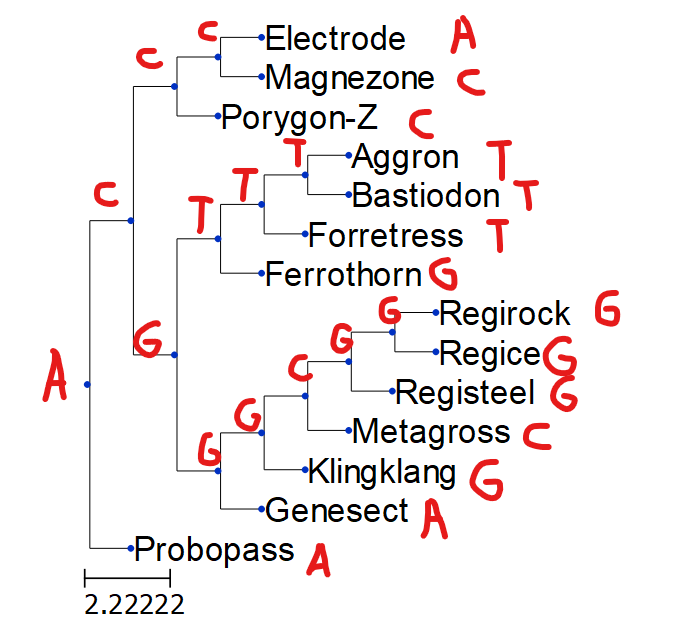

3+3+2+4+4+4+2+2 = parsimony score of 24

In [290]:
# After traceback, N2
tree_nodes_list = traceback(N2)
for n in tree_nodes_list:
     print("Node name: ", n.name, " Node score: ", n.score, " Node nucleotide: ", n.nucleotide)

Node name:  *Node_1  Node score:  [8, 4, 0, 8]  Node nucleotide:  G
Node name:  *Node_2  Node score:  [8, 4, 0, 8]  Node nucleotide:  G
Node name:  *Node_3  Node score:  [7, 2, 2, 8]  Node nucleotide:  C
Node name:  *Node_4  Node score:  [5, 5, 6, 15]  Node nucleotide:  C
Node name:  *Node_5  Node score:  [9, 7, 6, 13]  Node nucleotide:  G
Node name:  *Node_6  Node score:  [18, 8, 8, 0]  Node nucleotide:  T
Node name:  *Node_7  Node score:  [13, 6, 4, 4]  Node nucleotide:  T
Node name:  *Node_8  Node score:  [17, 10, 8, 4]  Node nucleotide:  T
Node name:  *Node_9  Node score:  [12, 11, 12, 13]  Node nucleotide:  T
Node name:  *Node_10  Node score:  [21, 18, 18, 23]  Node nucleotide:  C
Node name:  *Node_11  Node score:  [3, 3, 6, 13]  Node nucleotide:  C
Node name:  *Node_12  Node score:  [6, 3, 7, 11]  Node nucleotide:  C
Node name:  *Node_13  Node score:  [27, 21, 23, 29]  Node nucleotide:  C


Due to lack of time, I did not parse back the nucleotides to get another tree representation, but here is a crude picture:
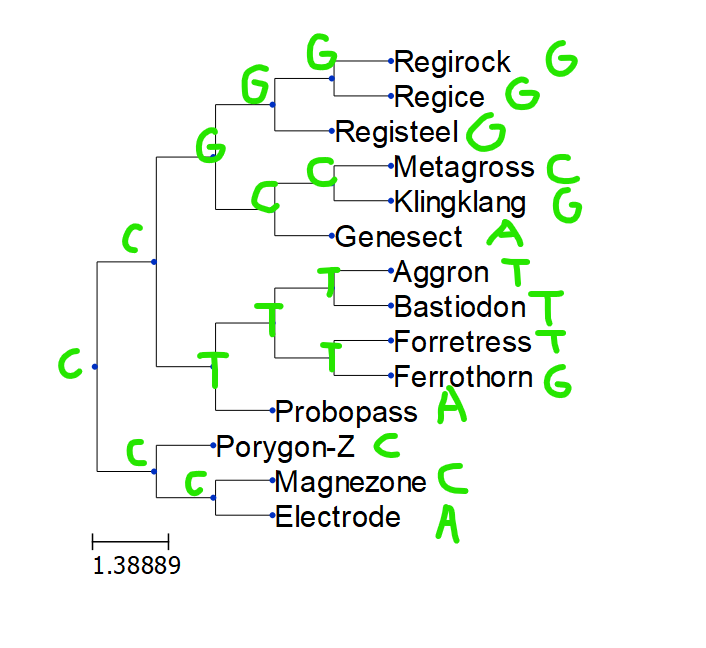
2+2+2+3+4+4+9+3 = parsimony score of 29

We can tentatively say that the first tree is more parsimonious, having an overall lower score.

In [43]:
# ORIGINAL TEST FUNCTION ON SIMPLER SEQUENCE, IGNORE

originalpoke = "( Lucario , ( Metagross , Probopass ));"
poke = originalpoke[:-1] # Remove last element ;
poke = poke.replace(" ","")

node_number = 0           # node nb will be the break condition for the while loop
for c in poke:
    if c == ',':
        node_number += 1

node_instance = 0
nodes_list = []           # stores every node that has been identified        

while(node_instance < node_number): # while we have'nt identified every node yet

    # Lists and variables necessary for counting through our string 
    charcount = 0
    node_opencount = 0
    node_openpos = []

    for n in poke:            # NOTE: reversed is an iterator, you can't call a print to it

        if(n == '('):         # if we find a node being opened
            node_opencount += 1 
            node_openpos.append(charcount)

        if(n == ')'):         # start to create a node object
            node_instance += 1

            close_node = charcount
            open_node = node_openpos[-1]                 # get last position where a node was opened
            node_elements = poke[open_node+1:close_node]
            split_node = node_elements.split(',')

            internal_node = node(name = "*Node_" + str(node_instance), left = split_node[1], right = split_node[0], score = [0,0,0,0]) # score is placeholder for now
            nodes_list.append(internal_node)             # add to our list of nodes. The * means it's a node and not a leaf

            poke = poke.replace(poke[open_node:close_node+1],internal_node.name)
            # print(poke)
            break # restart loop, with updated merged branches or nodes. Not the most efficient but should work

        charcount += 1       # has to occur after all the updates
    # print(poke)
    
for n in nodes_list:
    print("Node name: ", n.name, " Node left child: ", n.left," Node right child: ", n.right)

Node name:  *Node_1  Node left child:  Probopass  Node right child:  Metagross
Node name:  *Node_2  Node left child:  *Node_1  Node right child:  Lucario
